<a href="https://colab.research.google.com/github/hiraz18/Automata-Arcade-/blob/main/Automata_Arcade_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part 1: Loading and Exploring the Dataset

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('diabetes.csv')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# .info() gives a summary of columns, data types, and checks for missing values.
print("\n--- Getting information about our columns ---")
df.info()

# .describe() provides a statistical summary (mean, min, max, etc.) for each column.
print("\n--- Statistical summary of the data ---")
print(df.describe())



--- Getting information about our columns ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

--- Statistical summary of the data ---
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   


Part 2: Visualizing the Data (Finding Patterns)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


--- Plotting the distribution of the Outcome ---


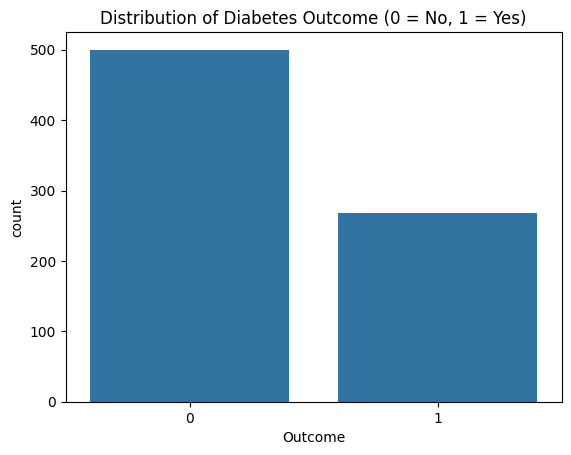

In [ ]:
print("\n--- Plotting the distribution of the Outcome ---")
sns.countplot(x='Outcome', data=df)
plt.title('Distribution of Diabetes Outcome (0 = No, 1 = Yes)')
plt.show()


Part 3: Training the Machine Learning Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
X=df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y=df['Outcome']

In [ ]:
# Split data into training and testing sets ---
# We train the model on 80% of the data and test its performance on the unseen 20%.
# random_state=42 ensures the split is the same every time.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Data split into {len(X_train)} training samples and {len(X_test)} testing samples.")


Data split into 614 training samples and 154 testing samples.


In [ ]:
# Create and Train the Logistic Regression Model ---
# We increase max_iter to help the model find the best solution.
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
print("Logistic Regression model training complete!")

Logistic Regression model training complete!


In [ ]:
# Evaluate the Model ---
# The model makes predictions on the test data.
y_pred = model.predict(X_test)
# We compare the predictions to the actual answers to get the accuracy.
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy on the test set: {accuracy}")


Model Accuracy on the test set: 0.7467532467532467


In [ ]:
# Make a prediction on a new, imaginary patient ---
print("\n--- Making a prediction for a new patient ---")
# Data: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]
new_patient_data = [[2, 150, 70, 30, 100, 32.5, 0.5, 40]]
prediction = model.predict(new_patient_data)

if prediction[0] == 1:
    print("Prediction: The model predicts this person HAS diabetes.")
else:
    print("Prediction: The model predicts this person DOES NOT have diabetes.")



--- Making a prediction for a new patient ---
Prediction: The model predicts this person HAS diabetes.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
